In [71]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas
import vg
import numpy as np
plt.style.use('notebook')

from os import path
import sys
sys.path.insert(0, path.abspath(path.join(path.curdir, '../src')))

from mythicwind.ellipse import calc_ddt


%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
def calc_angle_signed(v1, v2, view_axis=np.array([0, 0, -1])):
    angle_signed = vg.signed_angle(v1, v2, view_axis)
    print(f'original angle: {angle_signed:1.2f}')
    if angle_signed < 0:
        angle_signed += 360
        print(f'corrected angle {angle_signed:1.2f}')
    return angle_signed

[ 0  0 -1]


<IPython.core.display.Javascript object>


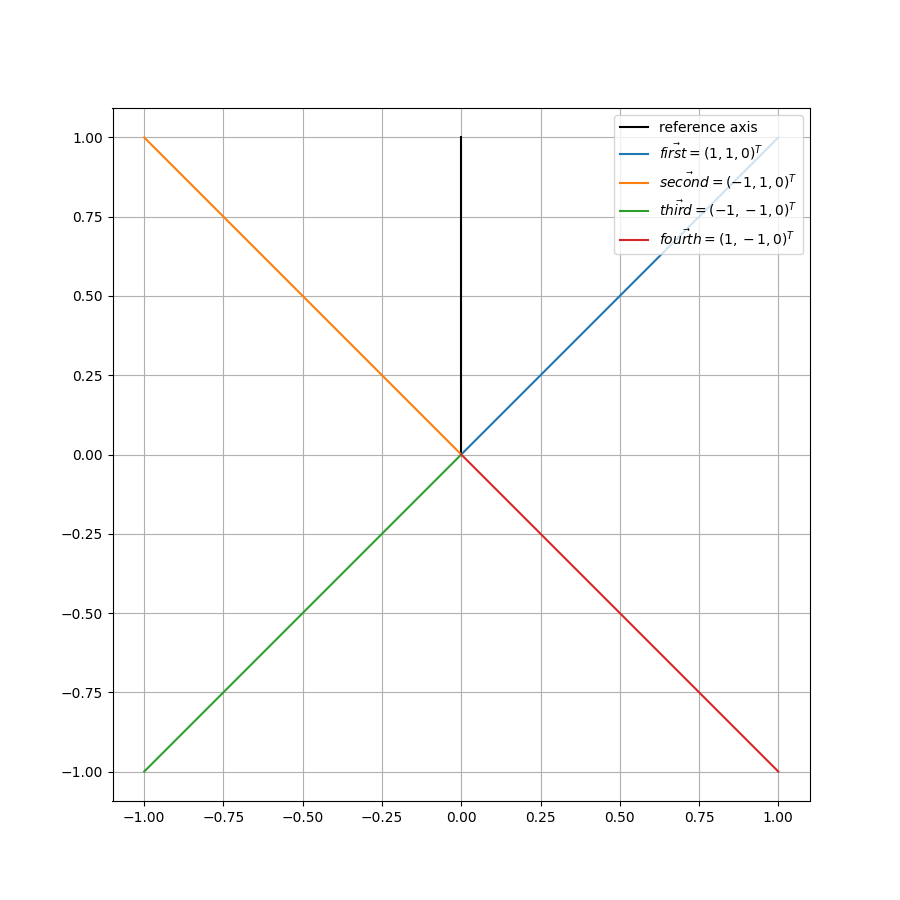

[1 1 0]
original angle: 45.00
45.00000000000001
[-1  1  0]
original angle: -45.00
corrected angle 315.00
315.0
[-1 -1  0]
original angle: -135.00
corrected angle 225.00
225.0
[ 1 -1  0]
original angle: 135.00
135.0


In [7]:
reference_axis = np.array([0, 1, 0])

zero = np.array([0, 0, 0])
first = np.array([1, 1, 0])
second = np.array([-1, 1, 0])
third = np.array([-1, -1, 0])
fourth = np.array([1, -1, 0])

view_axis = vg.cross(reference_axis, first)
print(view_axis)

plt.figure(figsize=(9, 9))
plt.plot([zero[0], reference_axis[0]], [zero[1], reference_axis[1]], color='k', label='reference axis')
plt.plot([zero[0], first[0]], [zero[1], first[1]], label="$\\vec{first} = (1, 1, 0)^{T}$")
plt.plot([zero[0], second[0]], [zero[1], second[1]], label="$\\vec{second} = (-1, 1, 0)^{T}$")
plt.plot([zero[0], third[0]], [zero[1], third[1]], label="$\\vec{third} = (-1, -1, 0)^{T}$")
plt.plot([zero[0], fourth[0]], [zero[1], fourth[1]], label="$\\vec{fourth} = (1, -1, 0)^{T}$")

plt.axis('equal')
plt.legend(loc = 'upper right')
plt.grid()


for vector in (first, second, third, fourth):
    print(vector)
    print(f'{calc_angle_signed(reference_axis, vector)}')

In [9]:
x = np.array([np.arange(0, 361, 1) for i in range(3)]).flatten()
t = np.linspace(0, 3, num=len(x))
data = pd.DataFrame({'time' : pd.to_datetime(t, unit='s', utc=True), 'x' : x})
data.set_index('time', inplace=True)

<IPython.core.display.Javascript object>


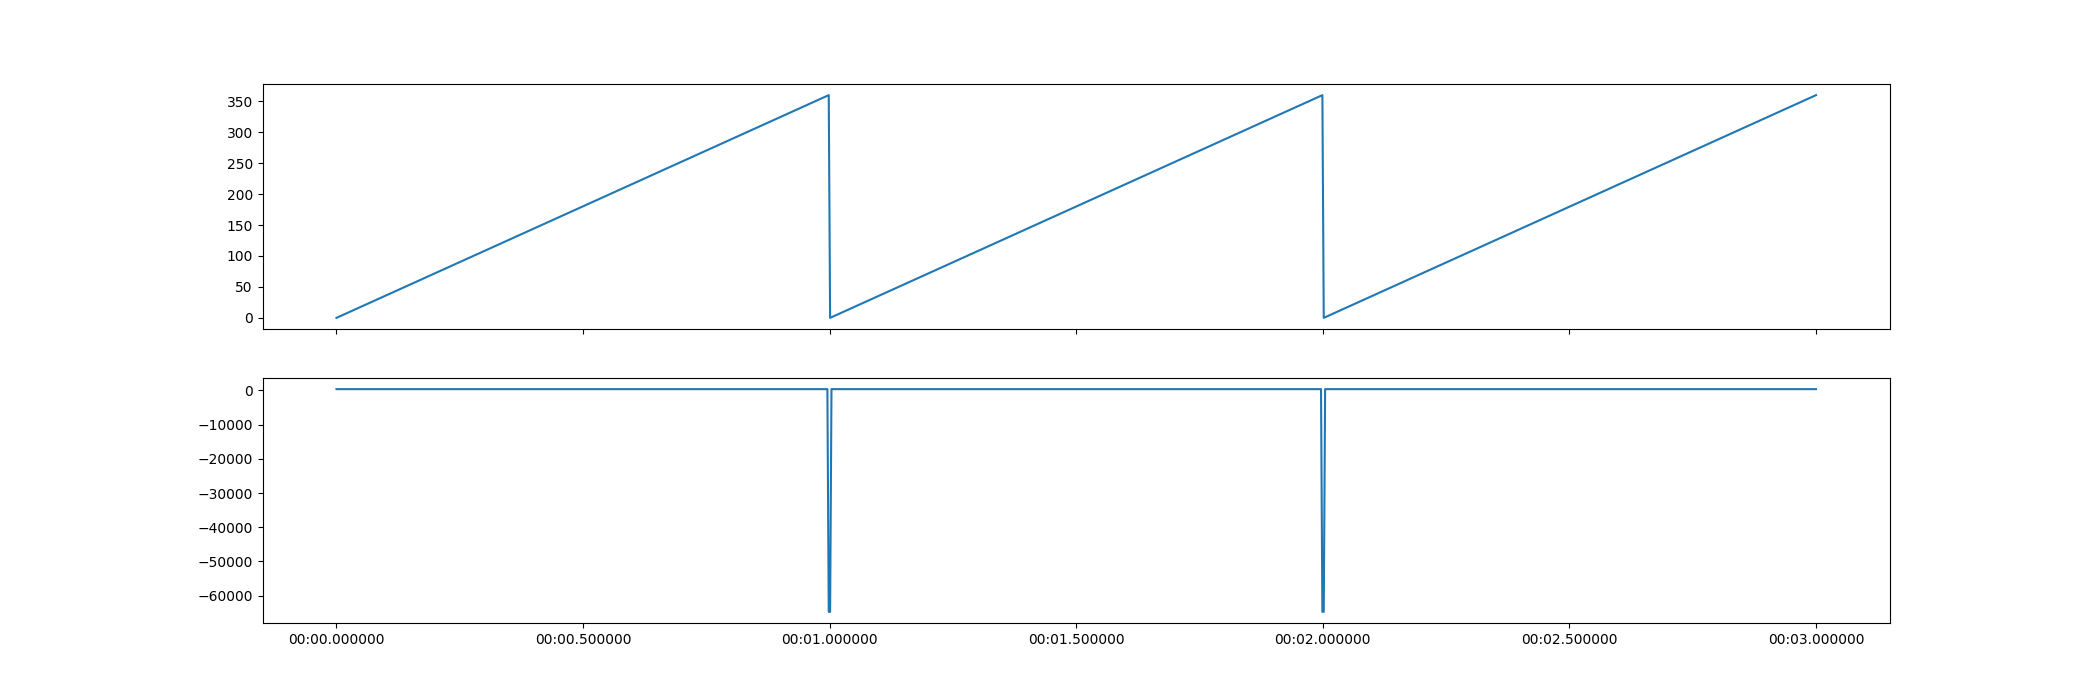

In [75]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
ax1.plot(data.x)
ax2.plot(data.index.to_numpy(), calc_ddt(data.x))

In [29]:
data.index.to_series().diff().dt.total_seconds()

time
1970-01-01 00:00:00+00:00                   NaN
1970-01-01 00:00:00.002772643+00:00    0.002773
1970-01-01 00:00:00.005545287+00:00    0.002773
1970-01-01 00:00:00.008317929+00:00    0.002773
1970-01-01 00:00:00.011090573+00:00    0.002773
                                         ...   
1970-01-01 00:00:02.988909427+00:00    0.002773
1970-01-01 00:00:02.991682070+00:00    0.002773
1970-01-01 00:00:02.994454713+00:00    0.002773
1970-01-01 00:00:02.997227357+00:00    0.002773
1970-01-01 00:00:03+00:00              0.002773
Name: time, Length: 1083, dtype: float64

In [64]:
t = (data.index.to_series().astype('int64')/1e9).to_numpy()
dt = data.index.to_series().diff().dt.total_seconds().fillna(value=0.0).to_numpy()
x = data.x.to_numpy()

In [65]:
t

array([0.00000000e+00, 2.77264300e-03, 5.54528700e-03, ...,
       2.99445471e+00, 2.99722736e+00, 3.00000000e+00])

In [43]:
dt

array([0.        , 0.00277264, 0.00277264, ..., 0.00277264, 0.00277264,
       0.00277264])

In [44]:
x

array([  0,   1,   2, ..., 358, 359, 360])

In [66]:
np.gradient(x, t)

array([360.66669961, 360.66663457, 360.66669961, ..., 360.66663457,
       360.66663457, 360.66669961])

In [69]:
data.x.index

DatetimeIndex([          '1970-01-01 00:00:00+00:00',
               '1970-01-01 00:00:00.002772643+00:00',
               '1970-01-01 00:00:00.005545287+00:00',
               '1970-01-01 00:00:00.008317929+00:00',
               '1970-01-01 00:00:00.011090573+00:00',
               '1970-01-01 00:00:00.013863216+00:00',
               '1970-01-01 00:00:00.016635859+00:00',
               '1970-01-01 00:00:00.019408503+00:00',
               '1970-01-01 00:00:00.022181146+00:00',
               '1970-01-01 00:00:00.024953789+00:00',
               ...
               '1970-01-01 00:00:02.975046211+00:00',
               '1970-01-01 00:00:02.977818854+00:00',
               '1970-01-01 00:00:02.980591497+00:00',
               '1970-01-01 00:00:02.983364140+00:00',
               '1970-01-01 00:00:02.986136784+00:00',
               '1970-01-01 00:00:02.988909427+00:00',
               '1970-01-01 00:00:02.991682070+00:00',
               '1970-01-01 00:00:02.994454713+00:00',
         